<a href="https://colab.research.google.com/github/sagc13/Fundamentos-tecnicos-y-aplicaciones-ML/blob/main/Examen_Fundamentos_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Examen Machine Learning**

## **1. Sistema de Ecuaciones**

### *Descripción*

Eliga un sistema de ecuaciones de tres variables (y 3 ecuaciones), escriba las ecuaciones en una celda de texto y despúes soluciónelo mediante código, utilizando el módulo de algebra lineal de la biblioteca numpy.
Exlique el significado de la solución




### *Ecuaciones*

> -2x + y + 2z = -13

> 3x + 6y + z = 11

> 5x + 8y + z = 19






### *Solución*

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [93]:
#Matriz de coeficientes
M = np.array([[-2., 1., 2.], [3., 6., 1.], [5., 8., 1.]]) 

#Variables dependientes
b =  np.array([-13, 11, 19])

solucion = np.linalg.solve(M, b)

In [94]:
print("Valor de X = ",solucion[0].round())
print("Valor de Y = ",solucion[1].round())
print("Valor de Z = ",solucion[2].round())


Valor de X =  3.0
Valor de Y =  1.0
Valor de Z =  -4.0


### *Explicación*

El módulo de algebra lineal de la biblioteca numpy utiliza 2 parametros:
- (a) La Matriz de coeficientes de  las ecuaciones
- (b) Los Valores de ordenadas o “variables dependientes” (los valores del lado derecho de la ecuacio´n)

La función "np.linalg.solve" resuelve la ecuación de 3x3, es decir, obtiene el resultado para X, Y y Z. Que es la función para calcular la inversa de una matriz. 

## **2. Emparejamiento**

### *Descripción*

Realice el emparejamiento de 5 estudiantes a 5 mujeres con sus preferencias asignadas al azar, pasando los datos por el algoritmo de emparejamiento con dos variantes:
* simulando que las mujeres son quien proponen el emparejamiento.
* simulando que los hombres son quien proponen el emparejamiento

Explique los hallazgos


### *Funciones*

In [95]:
import numpy as np

In [96]:
def pref_emparejar_p1_sobre_p0(preferencia, p2, p0, p1): 
  '''Esta función prueba si la posición 'p2' prefiere a la posición 'p1'
     sobre la posición 'p0' '''
  N = preferencia.shape[1]

  for i in range(N): 
          
      # Si p1 está antes de h en la lista de m,  
      # entonces la mujer se queda con la posición p1
      if (preferencia[p2][i] == p1): 
          return True
  
      # En caso contrario m  se queda con h
      if (preferencia[p2][i] == p0): 
          return False

In [97]:
def stableMarriage(preferencia,proponente): 
     
  N = preferencia.shape[1]

  # La lista M_pareja guarda la pareja de las posiciones a 'emparejar'  
  # el valor M_pareja[i] es el valor de la pareja asignada a la posición a 
  # emparejar N+i. 
  # Cuando el valor es -1 indica que la posición 'emparejar' está libre
  M_pareja = [-1 for i in range(N)]  
  
  # la lista M_compromiso va a guardar el estatus de cada posición 
  # 'proponente', el valor de M_compromiso[i] es verdadero cuando está 
  # comprometido y falso cuando está libre. 
  M_compromiso = [False for i in range(N)] 
  
  libres = N 
  
  #Mientras existan posiciones 'proponentes' libres
  while (libres > 0):  
    # Escoje cualquier posición 'proponente' libre
    h = 0
    while (h < N): 
        # si el proponente h está no está comprometido, se rompe el ciclo while
        if (M_compromiso[h] == False):         
          break
        # de otra manera se prueba con el que sigue hasta encontrar uno libre 
        h += 1      
  
    # h es entonces un proponente libre y se buscara una posición a emparejar  
    # de acuerdo con sus preferencias 
    i = 0
    while i < N and M_compromiso[h] == False: 
      m = preferencia[h][i] 
  
      # Si la primera posición a emparejar de sus preferencias m está libre,  
      # m y h se comprometen (no se casan) 
      if (M_pareja[m - N] == -1): 
          M_pareja[m - N] = h 
          M_compromiso[h] = True
          libres -= 1  #se resta uno a las posiciones 'proponentes' libres

      else:
                  
          # Si la posición a 'emparejar' no está libre, se revisa con qué
          # posición 'proponente' esta comprometida
          h1 = M_pareja[m - N] 
  
          # Se revisa si la posición a 'emparejar' prefiere a su compormetido
          # (h1) sobre  h. 
          if (pref_emparejar_p1_sobre_p0(preferencia, m, h, h1) == False): 
              M_pareja[m - N] = h 
              M_compromiso[h] = True
              M_compromiso[h1] = False
      i += 1 
  
  proponentes = np.array(M_pareja)
  emparejados = np.arange(N, 2*N)

  if (proponente == 'hombre'):
      parejas =np.column_stack((proponentes,emparejados))

  else:
      parejas =np.column_stack((emparejados,proponentes))

  return parejas

### *Simulación Hombres*

In [98]:
#Se define la matriz de preferencias
M_pref = {}  

#Para los Hombres, se guardan en la matriz del 0 al 4
for i in range(0, 5): 
  M_pref[i] = np.random.choice(range(5,10), 5, replace=True)

#Para las mujeres se guardaran en la matriz del 5 al 9 
for i in range(5,10):
  M_pref[i] = np.random.choice(range(0, 5), 5, replace=True)   

preferenciaH = np.stack(list(M_pref.values()), axis=0)
preferenciaH

array([[8, 8, 8, 9, 7],
       [9, 8, 8, 7, 5],
       [6, 9, 7, 8, 6],
       [9, 8, 6, 9, 5],
       [9, 9, 7, 5, 6],
       [2, 3, 4, 2, 3],
       [4, 2, 4, 3, 0],
       [3, 0, 4, 0, 1],
       [4, 1, 0, 1, 4],
       [4, 1, 0, 2, 3]])

In [99]:
parejas = stableMarriage(preferenciaH,"hombre")
parejas

array([[3, 5],
       [2, 6],
       [0, 7],
       [1, 8],
       [4, 9]])

### *Simulación Mujeres*

In [100]:
#Se define la matriz de preferencias
M_pref = {}  

#Para los Hombres, se guardan en la matriz del 0 al 4
for i in range(0, 5): 
  M_pref[i] = np.random.choice(range(5,10), 5, replace=True)

#Para las mujeres se guardaran en la matriz del 5 al 9 
for i in range(5,10):
  M_pref[i] = np.random.choice(range(0, 5), 5, replace=True)   

preferenciaM = np.stack(list(M_pref.values()), axis=0)
preferenciaM

array([[9, 9, 5, 8, 6],
       [6, 8, 7, 8, 5],
       [5, 9, 7, 6, 7],
       [8, 7, 6, 9, 9],
       [6, 7, 8, 8, 6],
       [4, 3, 2, 0, 2],
       [1, 1, 1, 0, 2],
       [1, 4, 3, 1, 4],
       [4, 4, 1, 0, 2],
       [2, 3, 4, 0, 2]])

In [101]:
parejas = stableMarriage(preferenciaM, 'mujer')
parejas

array([[5, 2],
       [6, 1],
       [7, 4],
       [8, 3],
       [9, 0]])

### *Explicación de Hallazgos*

- La función de emparejamiento regresa una matriz con las parejas formadas en cada renglón.
- La función recibe como parámetro prinipal la matriz de preferencias, donde los primeros 5 renglones indican las preferencias de los hombres; y los siguientes 5 renglones indican las preferencias de las mujeres. 
- Independientemente de si recibe hombre o mujer como segundo parámetro, la función siempre tomará los primeros renglones (en este caso 5) como la posición proponente y los renglones restantes como la posición a ser emparejada. 
- Modifiqué un poco la función, para que simplemente reciba como segundo parámetro el dato de quien propone, de forma tal que como resultado regrese una matriz cuya primer columna es la proponente y la segunda la emparejada.

## **3. Clasificación**

### *Descripción*

Realiza una clasificación de mensajes de texto  utilizando Naïve Bayes y la base de datos [spam.csv](https://github.com/AnIsAsPe/ElementosEstadisticaMachineLearningPython/blob/master/Semana8/spam.csv)

### *Carga de datos*

In [102]:
#Carga de Librerías
import numpy as np
import pandas as pd

In [103]:
#Leer archivo csv del link proporcionado
datos = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/ElementosEstadisticaMachineLearningPython/master/Semana8/spam.csv',
                   encoding = 'ISO-8859-1',usecols=['v1', 'v2'])

datos.shape

(5572, 2)

In [104]:
datos.columns = ['Tipo','Titulo']
datos.sample(5)

,Tipo,Titulo
3085,ham,I wish that I was with you. Holding you tightl...
2323,ham,Sorry dude. Dont know how i forgot. Even after...
1533,ham,Horrible bf... I now v hungry...
1080,ham,You tell what happen dont behave like this to ...
2410,ham,Ok... Thanx... Gd nite 2 Ì_ too...


### *Preprocesamiento*

In [105]:
#Carga de Librerías
import nltk
from nltk.corpus import stopwords
from nltk import SnowballStemmer
import re

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB  

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [106]:
def preprocesar(texto):
  #convierte a minúsculas
  texto = texto.lower()

  #elimina stopwords
  stop = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
  texto = stop.sub('', texto) 

  #stemmer (reduce la inflexión en las palabras a sus formas de raíz)
  tokens =  nltk.word_tokenize(texto)
  stemmer = SnowballStemmer("english")

  stems = [stemmer.stem(token) for token in tokens]
  texto=' '.join(stems) 

  #quita direcciones html
  borrar = re.compile('<.*?>')
  texto= re.sub(borrar, '', texto)

  #quita puntuaciones y todo lo que no sea letra y números
  texto = re.sub('[^A-ZÜÖÄa-z0-9å£]+', ' ', texto)

  #quita numeros
  texto = re.sub("\d+", " ", texto)
  
  return(texto)

In [107]:
datos['TituloP'] = datos['Titulo'].apply(preprocesar)

In [108]:
datos.sample(10)

,Tipo,Titulo,TituloP
989,ham,Ugh. Gotta drive back to sd from la. My butt i...,ugh got ta drive back sd la butt sore
4742,ham,I am in hospital da. . I will return home in e...,hospit da return home even
1214,ham,I'll text now! All creepy like so he won't thi...,text creepi like think forgot
2999,ham,Id onluy matters when getting on from offcampus,id onluy matter get offcampus
1355,ham,Convey my regards to him,convey regard
2678,ham,Was playng 9 doors game and gt racing on phone...,playng door game gt race phone lol
3142,ham,Boy; I love u Grl: Hogolo Boy: gold chain kods...,boy love u grl hogolo boy gold chain kodstini ...
5542,ham,Armand says get your ass over to epsilon,armand say get ass epsilon
3084,ham,In da car park,da car park
2997,ham,No b4 Thursday,b thursday


### *Vectorización*


In [109]:
cv = CountVectorizer()
mdt_frec = cv.fit_transform(datos['TituloP']) 

terminos = cv.get_feature_names()

mdt = pd.DataFrame(mdt_frec.todense(), 
                              index=datos.index, 
                              columns=terminos)
print(mdt.shape)  

mdt.head()

(5572, 6499)


,aa,aah,aaniy,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,aberdeen,abi,abil,abiola,abj,abl,abnorm,abouta,abroad,absenc,absolut,abstract,abt,abta,aburo,abus,ac,academ,acc,accent,accentur,accept,access,accid,accident,accommod,accommodationvouch,accomod,accord,accordin,...,young,younger,youphon,your,yourinclus,yourjob,youuuuu,youwanna,youå,yovill,yowif,yoyyooo,yr,yrs,ystrday,yt,yth,yummi,yummmm,yun,yunni,yuo,yuou,yup,yupz,zac,zaher,zealand,zebra,zed,zero,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [110]:
X = mdt
y = datos['Tipo']

### *Entrenamiento y Prueba*

In [111]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                     random_state=3, shuffle=True)

print('Total de Correos: {}'.format(datos.shape[0]))
print('Correos en el conjunto de entrenamiento: {}'.format(X_train.shape[0]))
print('Correos en el conjunto de prueba: {}'.format(X_test.shape[0]))

Total de Correos: 5572
Correos en el conjunto de entrenamiento: 3900
Correos en el conjunto de prueba: 1672


In [112]:
#Proporción de correos por clases en el conjunto de entrenamiento
y_train.value_counts(normalize=True)

ham     0.870769
spam    0.129231
Name: Tipo, dtype: float64

In [113]:
#Proporción de correos por clases en el conjunto de prueba
y_test.value_counts(normalize=True)

ham     0.854665
spam    0.145335
Name: Tipo, dtype: float64

### *Clasificador Naïve-Bayes*

In [114]:
#https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes
clasificador = MultinomialNB()
clasificador.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [115]:
clasificador.classes_

array(['ham', 'spam'], dtype='<U4')

In [116]:
print(clasificador.feature_count_.shape)
clasificador.feature_count_

(2, 6499)


array([[1., 2., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [117]:
print(clasificador.feature_log_prob_.shape)
clasificador.feature_log_prob_

(2, 6499)


array([[ -9.68741271,  -9.2819476 ,  -9.68741271, ..., -10.38055989,
        -10.38055989,  -9.68741271],
       [ -9.54402301,  -9.54402301,  -9.54402301, ...,  -8.85087583,
         -8.85087583,  -9.54402301]])

In [118]:
#terminos con más peso para clasificar en ham
for p in clasificador.feature_log_prob_.argsort()[0,-10:]:
  print(terminos[p])

ur
got
love
ok
call
come
lt
gt
get
go


In [119]:
#terminos con más peso para clasificar en spam
for p in clasificador.feature_log_prob_.argsort()[1,-10:]:
  print(terminos[p])

min
claim
repli
stop
ur
mobil
text
txt
free
call


### *Evaluación del modelo*

In [120]:
#Carga de Librerías
import matplotlib.pyplot as plt       
import seaborn as sns

In [121]:
len(X_test)

1672

In [122]:
y_pred = clasificador.predict(X_test)

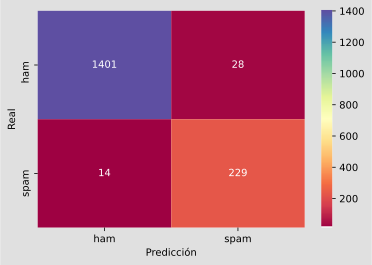

In [123]:
data = {'Y_Real':  y_test,
        'Y_Prediccion':y_pred
        }

df = pd.DataFrame(data, columns=['Y_Real','Y_Prediccion'])
confusion_matrix = pd.crosstab(df['Y_Real'], df['Y_Prediccion'], rownames=['Real'], colnames=['Predicción'])

sns.heatmap(confusion_matrix, annot=True, fmt='g',cmap="Spectral")
plt.show()

In [124]:
resultados_prediccion = pd.merge(df, datos['Titulo'], how='left', 
                                 left_index=True, right_index= True)
resultados_prediccion.head(3)

,Y_Real,Y_Prediccion,Titulo
2632,ham,ham,I WILL CAL YOU SIR. In meeting
454,spam,spam,"Loan for any purpose å£500 - å£75,000. Homeown..."
983,ham,ham,LOOK AT THE FUCKIN TIME. WHAT THE FUCK YOU THI...


In [125]:
#artículos mal clasificados
resultados_prediccion[resultados_prediccion['Y_Real']!=resultados_prediccion['Y_Prediccion']]

,Y_Real,Y_Prediccion,Titulo
671,spam,ham,SMS. ac sun0819 posts HELLO:\You seem cool
3434,ham,spam,\Hi darlin i cantdo anythingtomorrow as mypare...
4763,ham,spam,Hi.:)technical support.providing assistance to...
1081,ham,spam,Can u get pic msgs to your phone?
4380,ham,spam,Mathews or tait or edwards or anderson
5044,ham,spam,We have sent JD for Customer Service cum Accou...
3362,ham,spam,Can... I'm free...
3587,ham,spam,If you were/are free i can give. Otherwise nal...
3937,ham,spam,WHEN THE FIRST STRIKE IS A RED ONE. THE BIRD +...
5427,spam,ham,Santa Calling! Would your little ones like a c...


## **4. Diagnóstico / Pronóstico**

### *Descripción*

Escoja un problema de diagnóstico o pronóstico, identifique las variables relevantes y  diseñe una red bayesiana que contenga la probabilidad condicional de cada variable.

### *Librerías*

In [69]:
!pip install pyagrum  # permite utilicar biblioteca C++ aGrUM

In [70]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

### *Modelo: Deserción Bancaria*

In [71]:
# Creación de modelo de Deserción bancaria:
# La variable dependiente es (Abandono), es decir está condicionada a
# las otras variables que son independientes entre ellas
bn = gum.BayesNet("Abandono")
bn =gum.fastBN("Genero{M|F}<-Abandono{No|Si}->Tarjeta{Gold|Silver|Basic};Educacion{Básica|Media|Licenciatura|Posgrado}<-Abandono;Estado_Civil{Soltero|Casado|Divorciado|Otro}<-Abandono")

print(bn.variable("Genero"))
print(bn.variable("Tarjeta"))
print(bn.variable("Educacion"))
print(bn.variable("Estado_Civil"))

Genero<M,F>
Tarjeta<Gold,Silver,Basic>
Educacion<Básica,Media,Licenciatura,Posgrado>
Estado_Civil<Soltero,Casado,Divorciado,Otro>


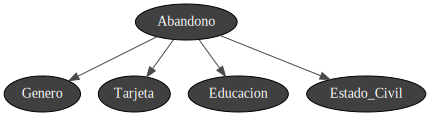

In [72]:
gnb.showBN(bn, size="9")

In [73]:
bn.cpt('Abandono')[:] = [.83, .16]
bn.cpt('Abandono').normalizeAsCPT()
bn.cpt('Abandono')

(gum::Potential<double>@0x2e49c80) 
  Abandono         |
No       |Si       |
---------|---------|
 0.8384  | 0.1616  |

In [74]:
bn.cpt('Genero')[{'Abandono':'No'}] = [.48, .52]
bn.cpt('Genero')[{'Abandono':'Si'}] = [.52, .48]
bn.cpt('Genero').normalizeAsCPT()
bn.cpt('Genero')

(gum::Potential<double>@0x321f760) 
      ||  Genero           |
Abando||M        |F        |
------||---------|---------|
No    || 0.4800  | 0.5200  |
Si    || 0.5200  | 0.4800  |

In [75]:
bn.cpt('Tarjeta')[{'Abandono':'No'}] = [.02,.05,.93]
bn.cpt('Tarjeta')[{'Abandono':'Si'}] = [.02,.05,.93]
bn.cpt('Tarjeta').normalizeAsCPT()
bn.cpt('Tarjeta')

(gum::Potential<double>@0x321eae0) 
      ||  Tarjeta                    |
Abando||Gold     |Silver   |Basic    |
------||---------|---------|---------|
No    || 0.0200  | 0.0500  | 0.9300  |
Si    || 0.0200  | 0.0500  | 0.9300  |

In [76]:
bn.cpt('Educacion')[{'Abandono':'No'}] = [.34,.10,.36,.20]
bn.cpt('Educacion')[{'Abandono':'Si'}] = [.33,.10,.35,.22]
bn.cpt('Educacion').normalizeAsCPT()
bn.cpt('Educacion')

(gum::Potential<double>@0x43f2fc0) 
      ||  Educacion                            |
Abando||Básica  |Media    |Licenciat|Posgrado |
------||---------|---------|---------|---------|
No    || 0.3400  | 0.1000  | 0.3600  | 0.2000  |
Si    || 0.3300  | 0.1000  | 0.3500  | 0.2200  |

In [77]:
bn.cpt('Estado_Civil')[{'Abandono':'No'}] = [.38,.47,.08,.07]
bn.cpt('Estado_Civil')[{'Abandono':'Si'}] = [.41,.43,.07,.09]
bn.cpt('Estado_Civil').normalizeAsCPT()
bn.cpt('Estado_Civil')

(gum::Potential<double>@0x472c1a0) 
      ||  Estado_Civil                         |
Abando||Soltero  |Casado   |Divorciad|Otro     |
------||---------|---------|---------|---------|
No    || 0.3800  | 0.4700  | 0.0800  | 0.0700  |
Si    || 0.4100  | 0.4300  | 0.0700  | 0.0900  |

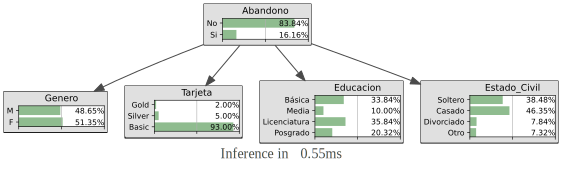

In [78]:
gnb.showInference(bn, evs={},size="9")

### *Análisis Diagnóstico*

¿Quienes abandondan el banco?

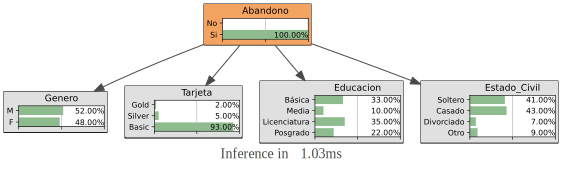

In [79]:
gnb.showInference(bn, evs={'Abandono':'Si'},size=9)

* De forma inicial, quienes tienden a abandonar el banco son personas solteras y casadas y con un tipo de tarjeta "Basica".


¿Qué características hay en Personas Solteras?

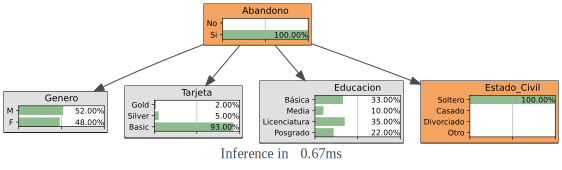

In [80]:
gnb.showInference(bn, evs={'Estado_Civil':'Soltero','Abandono':'Si'}, size="9")

* De forma adicional, los hombres tienen una tendencia mayor a abandonar el banco.

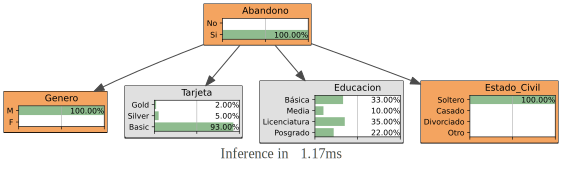

In [81]:
gnb.showInference(bn, evs={'Genero':'M','Abandono':'Si','Estado_Civil':'Soltero'}, size="9")

* Finalmente, los hombres solteros con el tipo de Tarjeta Basica, son las que tienen a abandonar el Banco.

¿Quiénes No Abandonan el Banco?

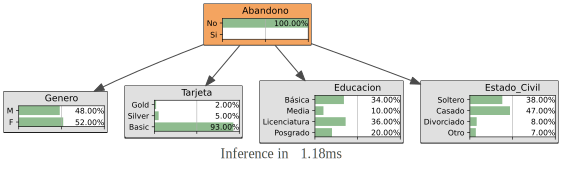

In [82]:
gnb.showInference(bn, evs={'Abandono':'No'}, size="9")

¿Qué características tienen los hombres casados?

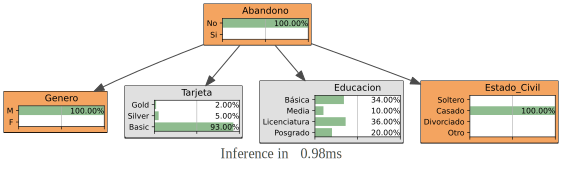

In [83]:
gnb.showInference(bn, evs={'Genero':'M','Abandono':'No','Estado_Civil':'Casado'}, size="9")

### *Modelo: Recursos Humanos*

In [84]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

Los datos a validar se encuentran en [HR.csv](https://raw.githubusercontent.com/sagc13/Fundamentos-tecnicos-y-aplicaciones-ML/main/Datos/HR.csv)
Esta BD fue tomada de Kaggle

In [54]:
from google.colab import files
files.upload()

Saving HR.csv to HR.csv


{'HR.csv': b'\xef\xbb\xbfBusinessTravel,Department,EducationField,JobLevel,JobRole,MaritalStatus,OverTime,Attrited\r\nTravel_Rarely,Sales,Life Sciences,2,Sales Executive,Single,Yes,Yes\r\nTravel_Frequently,Research & Development,Life Sciences,2,Research Scientist,Married,No,No\r\nTravel_Rarely,Research & Development,Other,1,Laboratory Technician,Single,Yes,Yes\r\nTravel_Frequently,Research & Development,Life Sciences,1,Research Scientist,Married,Yes,No\r\nTravel_Rarely,Research & Development,Medical,1,Laboratory Technician,Married,No,No\r\nTravel_Frequently,Research & Development,Life Sciences,1,Laboratory Technician,Single,No,No\r\nTravel_Rarely,Research & Development,Medical,1,Laboratory Technician,Married,Yes,No\r\nTravel_Rarely,Research & Development,Life Sciences,1,Laboratory Technician,Divorced,No,No\r\nTravel_Frequently,Research & Development,Life Sciences,3,Manufacturing Director,Single,No,No\r\nTravel_Rarely,Research & Development,Medical,2,Healthcare Representative,Married,No

In [85]:
learner = gum.BNLearner('HR.csv')
bn = learner.learnBN()

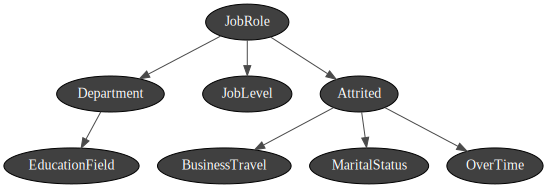

In [86]:
gnb.showBN(bn, size="10")

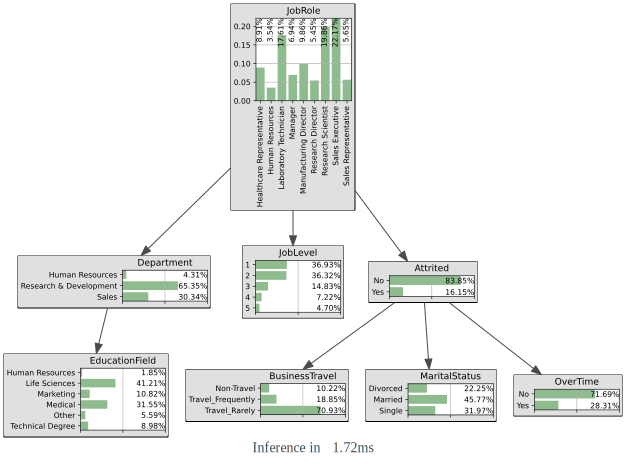

In [87]:
gnb.showInference(bn, evs={},size="9")

¿Quienes renuncian normalmente?

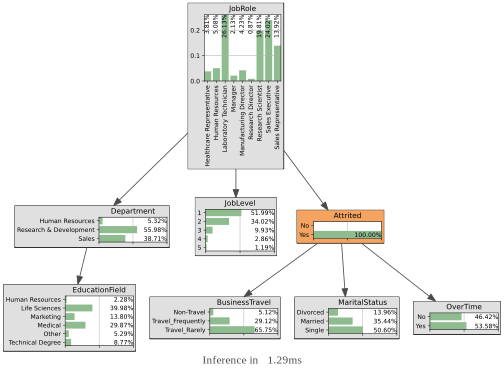

In [88]:
gnb.showInference(bn,evs={"Attrited":"Yes"}, size="7") 

* De acuerdo con los datos, principalmente renuncian las personas Solteras y que muy rara vez viajan.
* La mayoría de los que renuncian se encuentran en niveles de puesto Altos (1)

¿Que puestos son los más estables (no renuncian)?

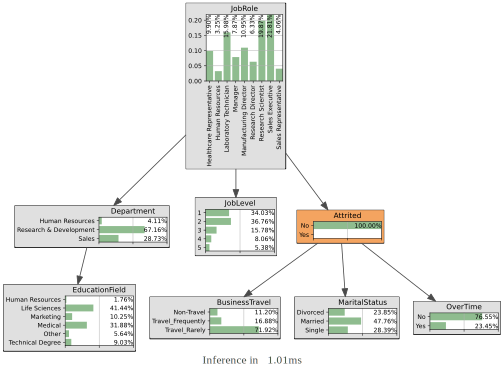

In [89]:
gnb.showInference(bn,evs={"Attrited":"No"}, size="7") 

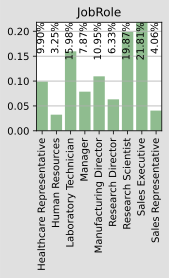

In [68]:
gnb.showPosterior(bn,evs={ "Attrited": 'No'},target='JobRole')

¿Qué educación tienen los principales puestos?

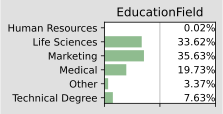

In [90]:
gnb.showPosterior(bn,evs={ "JobRole": 'Sales Executive'},target='EducationField')

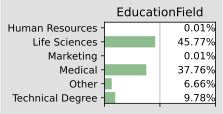

In [91]:
gnb.showPosterior(bn,evs={ "JobRole": 'Research Scientist'},target='EducationField')

* De acuerdo con los datos, el campo educacional más relevante es Life Sciences

In [92]:
gum.saveBN(bn, "HR.bif")